In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Scatpack data results
I'm using a programming language caled Python to read the data, analyze it, and make some plots.

### Load the data

In [44]:
df = pd.read_csv('./scat_pack_data.csv')
df.head()

,Date,MUC_id,Location_meters,Total_Weight_grams,Fur_grams,Bones_grams,Other_grams
0,11/3/17,1 MUC 4322,39.0,2.1,1.50,0.01,0.00
1,11/3/17,1 MUC 4322,-120.0,13.0,2.20,0.20,10.60
2,11/3/17,1 MUC 4322,-39.2,2.4,1.50,0.01,0.95
3,11/3/17,1 MUC 4322,-12.0,5.6,5.48,0.12,0.00
4,11/3/17,3 MUC 4361,-28.3,8.3,7.91,1.37,0.00


### This code makes the plots look the way that I want

In [45]:
def bar_plots(cat,data,ax,title):
    sns.barplot(cat, data, palette="Set1", ax=ax)
    ax.set_title(title,size=16)
    ax.set_ylim(0,1)
    sns.despine(bottom=True)
    ax.tick_params(axis='y', labelsize=16)
    ax.tick_params(axis='x', labelsize=14)
    plt.tight_layout(h_pad=3)

## MUC1

First, I selected onlt the data from MUC 1.

Second, I normalized the data by totaling the weight of each of the catagories and dividing that by the total weight of all of the collected scat.

The result is the __Fraction of Total Weight__ (or if you prefer percent, multiply by 100) for each catagory, which makes it easier to compare the composition of the scat from one MUC to another.


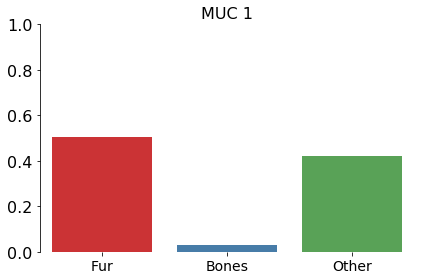

In [46]:
x = np.array(['Fur','Bones','Other'])
muc1 = df[df['MUC_id']=='1 MUC 4322']
muc1_sum = muc1[['Total_Weight_grams','Fur_grams','Bones_grams','Other_grams']].sum()
norm = muc1_sum/muc1_sum['Total_Weight_grams']
fig, ax = plt.subplots()
bar_plots(x, norm.values[1:],ax,'MUC 1')

## Now do that for all of the sites

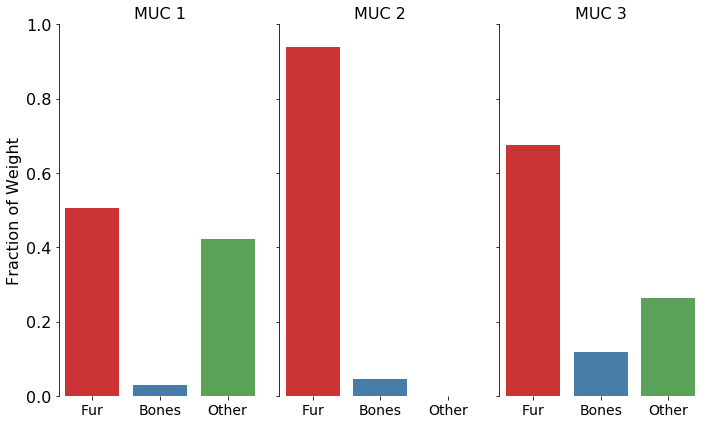

In [48]:
x = np.array(['Fur','Bones','Other'])
muc1 = df[df['MUC_id']=='1 MUC 4322']
muc1_sum = muc1[['Total_Weight_grams','Fur_grams','Bones_grams','Other_grams']].sum()
norm1 = muc1_sum/muc1_sum['Total_Weight_grams']

muc2 = df[df['MUC_id']=='2 MUC 4361']
muc2_sum = muc2[['Total_Weight_grams','Fur_grams','Bones_grams','Other_grams']].sum()
norm2 = muc2_sum/muc2_sum['Total_Weight_grams']

muc3 = df[df['MUC_id']=='3 MUC 4361']
muc3_sum = muc3[['Total_Weight_grams','Fur_grams','Bones_grams','Other_grams']].sum()
norm3 = muc3_sum/muc3_sum['Total_Weight_grams']



#### Plot the data ####
fig, ax = plt.subplots(ncols=3,sharey=True)
fig.set_size_inches(w=10,h=6)
bar_plots(x, norm1.values[1:],ax[0],'MUC 1')
bar_plots(x, norm2.values[1:],ax[1],'MUC 2')
bar_plots(x, norm3.values[1:],ax[2],'MUC 3')
ax[0].set_ylabel("Fraction of Weight",size=16)

plt.tight_layout()

Now you can look at each of these next to each other and see exactly how that differ

Location 4 data didn't look good, consider removing from this analysis 